In [1]:
# necessary import
%pylab inline
from pylab import *
import random as pyrandom
from scipy.spatial.distance import cdist
matplotlib.rc('image', cmap = 'gray')
from collections import Counter

Populating the interactive namespace from numpy and matplotlib


In [2]:
data = r_[10*randn(1000,2) + array([70,30]),
          10*randn(1000,2) + array([10,10]),
          10*randn(1000,2) + array([50,80])]

consider the above collection of points that are sampled in three different densities.

In [3]:
data = data[pyrandom.sample(range(len(data)), len(data))]
data

array([[21.60057749, 19.08186827],
       [54.06915451, 67.76265859],
       [70.19473093, 38.83104915],
       ...,
       [78.100968  , 30.77694131],
       [24.40853151, 10.33784714],
       [16.78941434, 18.0125222 ]])

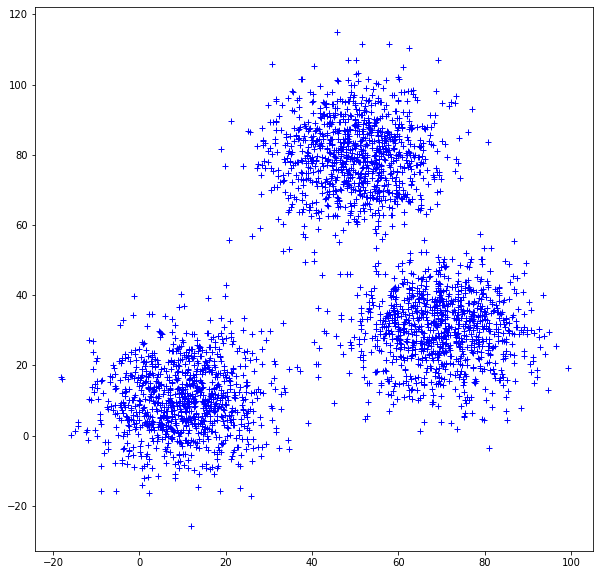

In [4]:
# from this we can see that there are 3 different clusters
figsize(10,10)
plot(data[:,0], data[:,1], 'b+')

In [6]:
# according to the K_means cluster we need to allocate a centroid value
centrodi = array([[30,30], [40,20], [0,90],[50,50]]) # 4 centroid value
start= centrodi.copy()

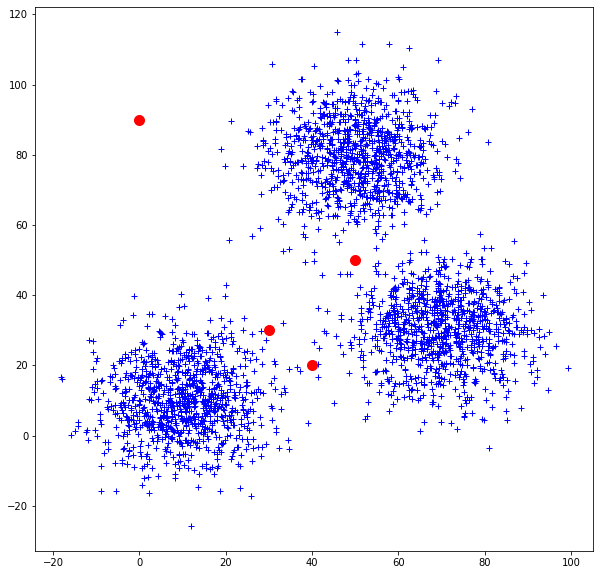

In [7]:
figsize(10,10)
plot(data[:,0], data[:,1], 'b+')
plot(centrodi[:,0], centrodi[:,1], 'ro', markersize = 10)

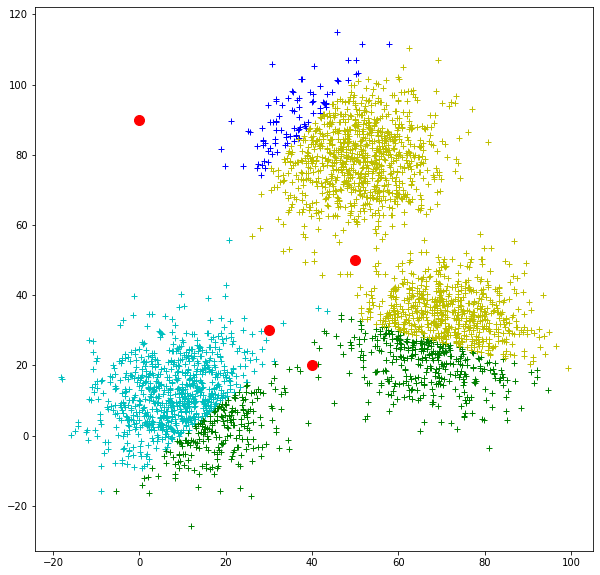

In [10]:
# we need to find the distance closet 
figsize(10,10)
dists = cdist(centrodi,data)
cloest = argmin(dists, axis =0)
for i in range(len(centrodi)):
  plot(data[cloest== i,0], data[cloest == i ,1] ,['c+', 'g+', 'b+', 'y+'][i])
plot(centrodi[:,0], centrodi[:,1], 'ro', markersize = 10)

In [11]:
history = [centrodi.copy()]

for i in range(len(centrodi)):
  centrodi[i,:] = average(data[cloest == i], axis=0)

history.append(centrodi.copy())

ValueError: ignored

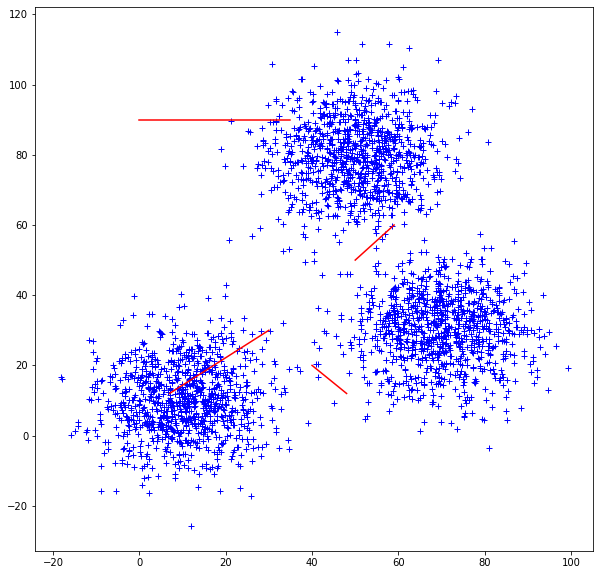

In [14]:
# Plot the centroid movements
figsize(10,10)
plot(data[:,0], data[:,1], 'b+')
harray = array(history)
for i in range(len(centrodi)):
  plot(harray[:,i,0], harray[:,i,1], 'r')

plot(harray[0,:,0], harray[0,:1], 'ko', markersize = 10)
plot(centrodi[:,0], centrodi[:,1], 'ro', markersize =10)

In [15]:
# repreate the process 

In [16]:
# Note that example with actual data 

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [19]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [20]:
x = df.iloc[:,3:]
x.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [31]:
# Elbow method
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters = i, init = 'k-means++' , random_state=43)
  kmeans.fit(x)
  wcss.append(kmeans.inertia_)

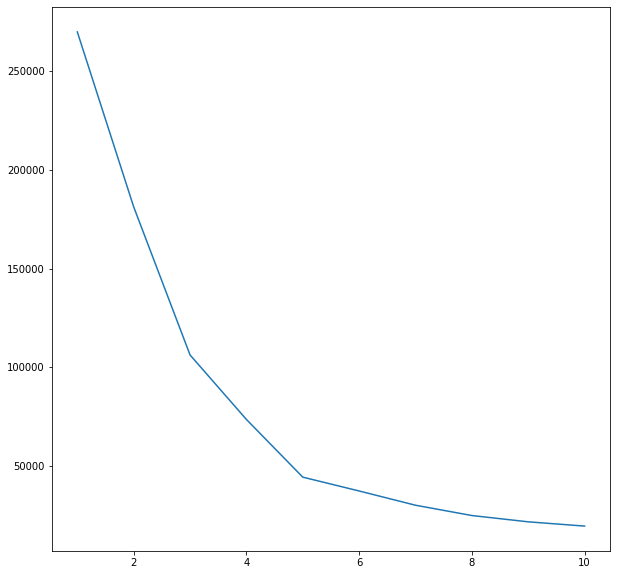

In [32]:
plt.plot(range(1,11), wcss)
plt.show()

In [33]:
# fitting to k_means to the dataset
kmeans = KMeans(n_clusters=5, init= 'k-means++', random_state= 42)
y_kmeans = kmeans.fit_predict(x)
y_kmeans

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0,
       2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 4, 0, 4, 1, 4, 1, 4,
       0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4], dtype=int32)

In [34]:
# It predict the cluster number to which the data point belong to 
test = kmeans.predict(np.asarray([[3,3]]))
test[0]

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  "X does not have valid feature names, but"


2